# 데이터 정리

* 28 x 28 image -> 합치면 총 784개의 x feature
* y 는 총 0~9까지의 숫자 중 예측, one-hot encoding 사용시 **10개**의 출력 
* 파일 직접 import 하는 것이 아닌 tensorflow에서 이걸 쓰라고 라이브러리 만들어 놓은게 있음


In [1]:
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)

/Users/sanghyuk/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist= input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [13]:
nb_classes = 10

In [19]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [16]:
W = tf.Variable(tf.random_normal([784, nb_classes]))
b= tf.Variable(tf.random_normal([nb_classes]))

In [20]:

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


In [22]:
#Test Model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

### 한번에 다 학습시키면 너무 많아서 batch_size 를 설정해서, 그 수만큼씩만 학습시킴<br>
**batch-size와 epoch 은 매우 일반적인 학습 방법**

epoch -> 전체 데이터셋을 1번 학습시키는 것을 1 epoch 이라 함. <br> 
1 epoch을 돌때 batch size로 짤라서 그만큼씩 학습시킴 <br>
ex) 1000 training 1000개인데 batch size가 500이면 2번 돌면 1 epoch <br>
전체 # training data / # batch size 하면 총 몇번 돌지를 알 수 있음 <br>

In [24]:
training_epochs = 15
batch_size =100

Epoch: 0001 cost = 2.957062667
Epoch: 0002 cost = 1.129626979
Epoch: 0003 cost = 0.896080582
Epoch: 0004 cost = 0.783330621
Epoch: 0005 cost = 0.716274962
Epoch: 0006 cost = 0.667711866
Epoch: 0007 cost = 0.630521649
Epoch: 0008 cost = 0.600100615
Epoch: 0009 cost = 0.577185039
Epoch: 0010 cost = 0.556519811
Epoch: 0011 cost = 0.538373777
Epoch: 0012 cost = 0.523016011
Epoch: 0013 cost = 0.509942682
Epoch: 0014 cost = 0.496032299
Epoch: 0015 cost = 0.486214741
Learning Finished
Accuracy:  0.8864
Label:  [6]
Prediction:  [6]


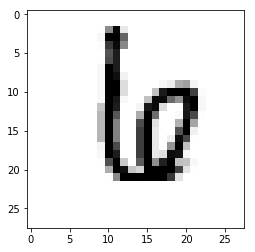

In [26]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #Training Cycle
    for epoch in range(training_epochs): #15epoch 돌 것
        avg_cost= 0 ; #epoch 새로 들어갈때마다 초기화
        #batch size 만큼 씩 끊으면 한 epoch 에 batch가 몇번인지를 의미
        total_batch = int(mnist.train.num_examples / batch_size) 
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {
                X: batch_xs, Y: batch_ys})
            avg_cost += c/total_batch #이렇게 다 돌면 해당 epoch 의 avg cost가 나오겠네
        print('Epoch:', '%04d' % (epoch+1),
             'cost =', '{:.9f}'.format(avg_cost))
        
    print("Learning Finished")
    
    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    
    # Get one and predict
    #random하게 하나를 읽어 옴. 
    # 0부터 뒷 수 사이의 임의의 정수
    r = random.randint(0, mnist.test.num_examples - 1) 
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()


In [ ]:
X = tf.placeholder(tf.float32, [None, 784])

sess.run() = 텐서.eval(session=sess)
같은의미임. 
하나만 실행시킬 땐 이렇게 함